In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf

In [71]:
train = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\HandWrittenDigitReconigation\\train.csv")
test = pd.read_csv("C:\\Projects\\DataAnalysisProjects\\HandWrittenDigitReconigation\\test.csv")

In [73]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=1212)

In [81]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_validation:',X_val.shape)
print('y_validation:',y_val.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [83]:
X_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
X_val_re = X_val.to_numpy().reshape(8400, 28, 28)
y_val_re = y_val.values
X_test_re = test.to_numpy().reshape(28000, 28, 28)

In [87]:
print("X_train_re",X_train_re.shape)
print("X_val_re",X_val_re.shape)
print("y_train_re",y_train_re.shape)
print("y_val_re",y_val_re.shape)
print("X_test_re",X_test_re.shape)

X_train_re (33600, 28, 28)
X_val_re (8400, 28, 28)
y_train_re (33600,)
y_val_re (8400,)
X_test_re (28000, 28, 28)


In [89]:
import matplotlib.pyplot as plt
import math

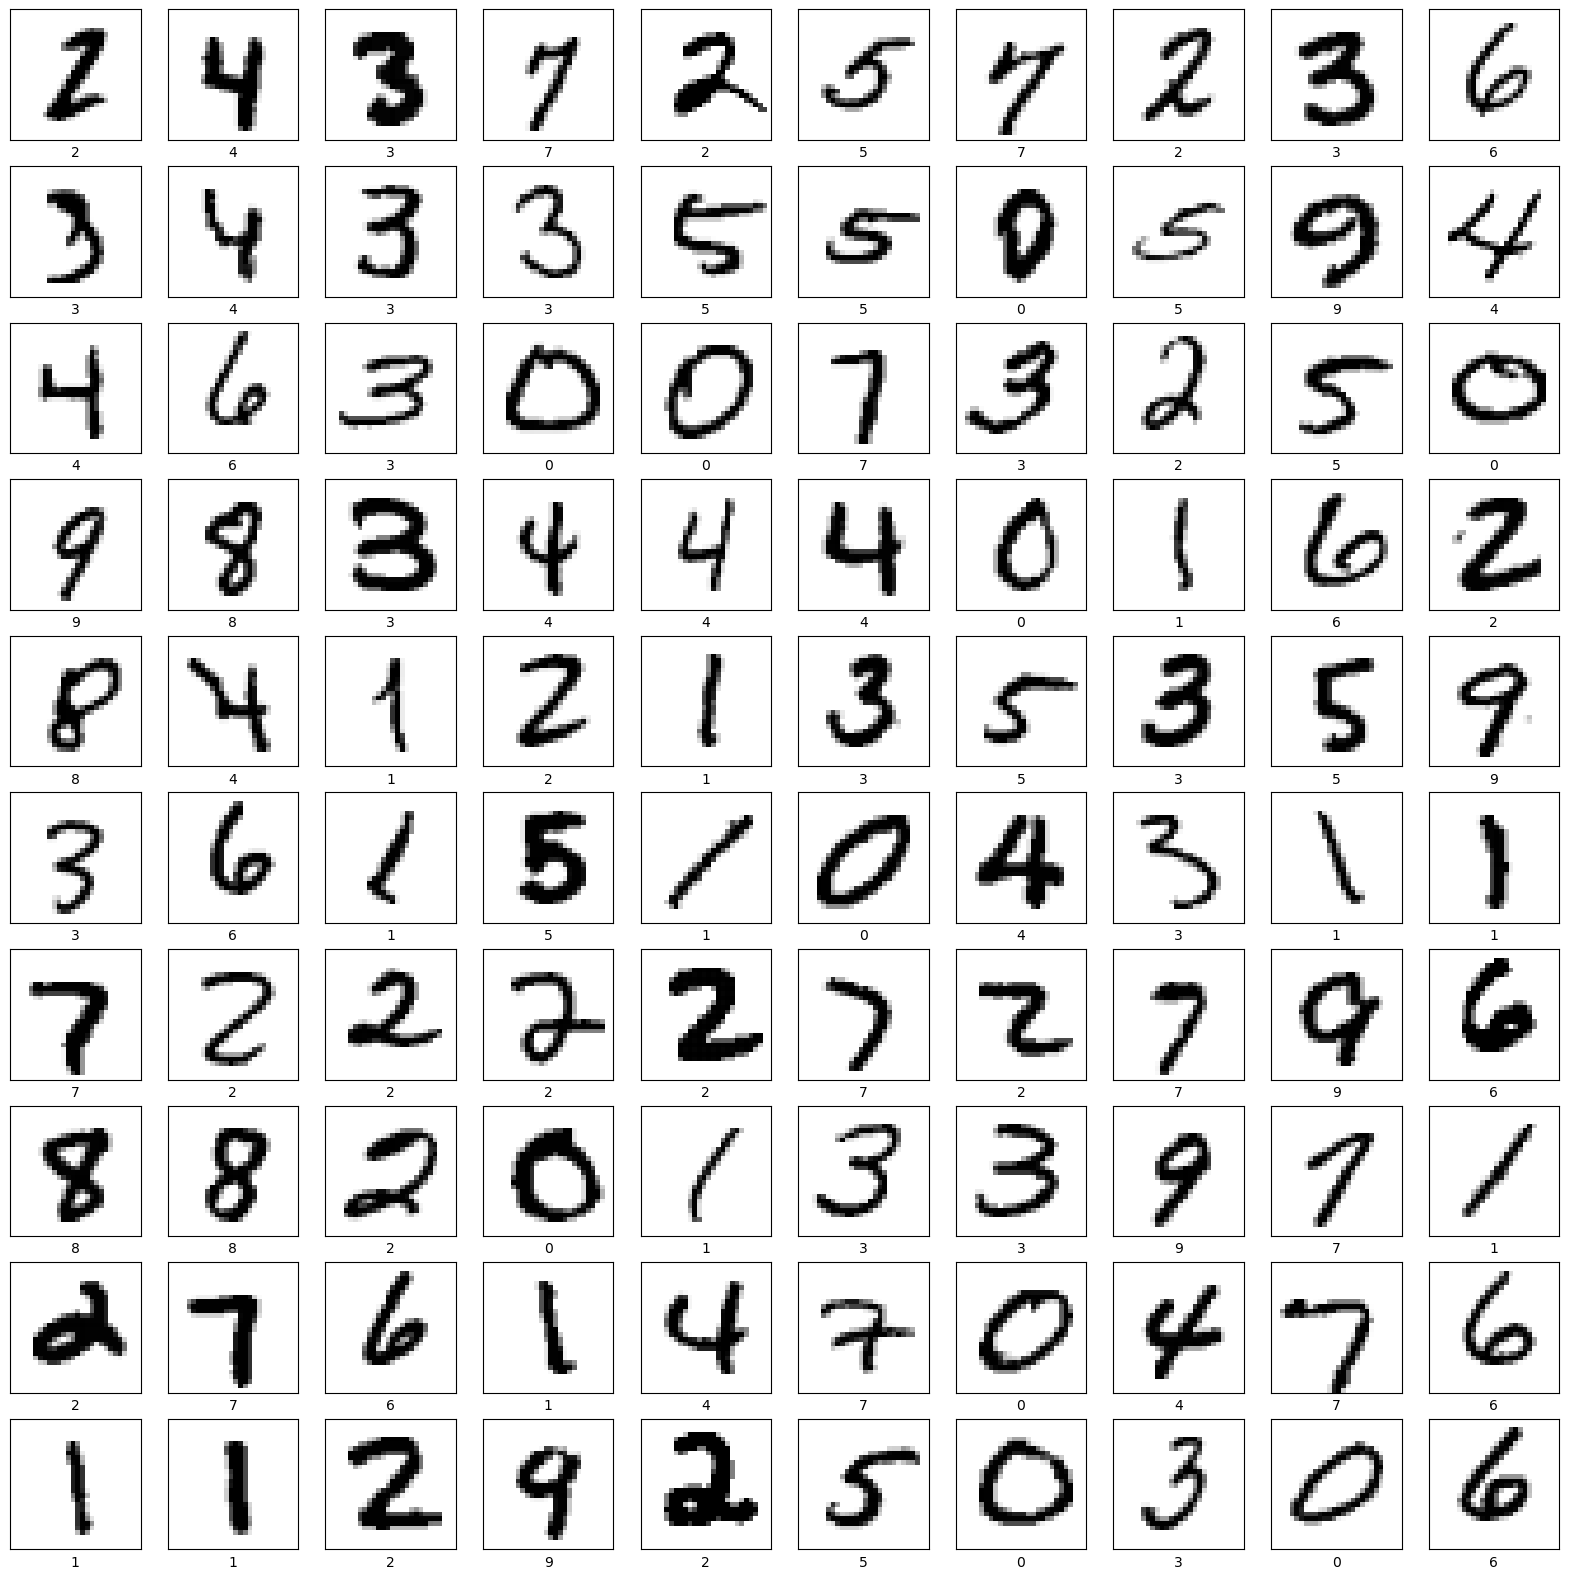

In [91]:
Total_no=100
num_cell=math.ceil(math.sqrt(Total_no))
plt.figure(figsize=(20,20))
for i in range(Total_no):
    plt.subplot(num_cell,num_cell,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_re[i],cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [93]:
(_,image_width, image_height)=X_train_re.shape
image_channel=1
print(image_width)
print(image_height)

28
28


In [105]:
x_train_with_chanels = X_train_re.reshape(
    X_train_re.shape[0],
    image_width,
    image_height,
    image_channel
)

x_validation_with_chanels = X_val_re.reshape(
    X_val_re.shape[0],
    image_width,
    image_height,
    image_channel
)

x_test_with_chanels = X_test_re.reshape(
    X_test_re.shape[0],
    image_width,
    image_height,
    image_channel
)


In [107]:
print('X_train_with_chanels:', x_train_with_chanels.shape)
print('X_validation_with_chanels:', x_validation_with_chanels.shape)
print('X_test_with_chanels:', x_test_with_chanels.shape)

X_train_with_chanels: (33600, 28, 28, 1)
X_validation_with_chanels: (8400, 28, 28, 1)
X_test_with_chanels: (28000, 28, 28, 1)


In [113]:
x_train_normalized=x_train_with_chanels/255
x_validation_normalized=x_validation_with_chanels/255
x_test_normalized=x_test_with_chanels/255

In [117]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.activations import softmax, relu
from keras.initializers import VarianceScaling
import tensorflow as tf

In [129]:
model = Sequential()

model.add(Convolution2D(input_shape=(image_width, image_height, image_channel),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=relu,
    kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(kernel_size=5, filters=16, strides=1, activation=relu,
    kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())

model.add(Dense(units=128,activation=relu))
model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=softmax,
    kernel_initializer=VarianceScaling()))

C:\Users\daroo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

model.compile(optimizer=Adam(),loss=sparse_categorical_crossentropy,metrics=['accuracy'])

In [135]:
training_histroy=model.fit(
    x_train_normalized,
    y_train_re,
    epochs=15,
    validation_data=(x_validation_normalized, y_val_re)
)

print("The model has successfully trained")

Epoch 1/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8201 - loss: 0.5859 - val_accuracy: 0.9717 - val_loss: 0.0908
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9711 - loss: 0.0939 - val_accuracy: 0.9806 - val_loss: 0.0660
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9804 - loss: 0.0644 - val_accuracy: 0.9831 - val_loss: 0.0535
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9850 - loss: 0.0466 - val_accuracy: 0.9867 - val_loss: 0.0468
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9877 - val_loss: 0.0477
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9898 - loss: 0.0321 - val_accuracy: 0.9857 - val_loss: 0.0471
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9880 - val_loss: 0.0478
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9925 - loss: 0.0

In [137]:
train_loss, train_accuracy=model.evaluate(x_train_normalized,y_train_re)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9983 - loss: 0.0051


In [139]:
print('Train loss:',round(train_loss,2)*100,'%')
print('Train accuracy:',round(train_accuracy,2)*100,'%')

Train loss: 0.0 %
Train accuracy: 100.0 %


In [141]:
test_loss, test_accuracy=model.evaluate(x_validation_normalized,y_val_re)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9920 - loss: 0.0459


In [143]:
print('test loss:',round(test_loss,2)*100,'%')
print('test accuracy:',round(test_accuracy,2)*100,'%')

test loss: 5.0 %
test accuracy: 99.0 %


In [176]:
model.save("digit_cnn_model.keras",include_optimizer=False)
print("Model successfully saved as 'digit_cnn_model.keras'")

Model successfully saved as 'digit_cnn_model.keras'


In [251]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import simpledialog
from tensorflow.keras.models import load_model

model = load_model('digit_cnn_model.keras')

canvas = np.ones((400, 400), dtype="uint8") * 0
drawing = False

def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(canvas, (x, y), 15, (255, 255, 255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("Draw Digit")
cv2.setMouseCallback("Draw Digit", draw)

print("Welcome to Hand Written Digit Recognization")
print("press 'p' to predict digit")
print("press 'c' to clear screen")
print("press ESC to exit")
print("✏️ Draw a digit")

while True:
    cv2.imshow("Draw Digit", canvas)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('p'):
        img = cv2.resize(canvas, (28, 28))
        img = img.astype("float32") / 255.0
        img = img.reshape(1, 28, 28, 1)

        prediction = model.predict(img)
        predicted_digit = int(np.argmax(prediction))
        print(f"Predicted Digit: {predicted_digit}")

        # Ask user only if it's wrong
        root = tk.Tk()
        root.withdraw()
        answer = simpledialog.askstring("Actual Digit", f"Was it correct? If not, enter the actual digit:")
        root.destroy()

        if answer and answer.isdigit():
            actual_digit = int(answer)
            if actual_digit != predicted_digit:
                print(f"Prediction was wrong! Predicted: {predicted_digit}. Actual: {actual_digit}")
            else:
                print("Prediction was correct.")

        canvas[:] = 0  # Clear for next digit

    elif key == ord('c'):
        canvas[:] = 0
        print("Canvas cleared")

    elif key == 27:  # ESC
        break

cv2.destroyAllWindows()


Welcome to Hand Written Digit Recognization
press 'p' to predict digit
press 'c' to clear screen
press ESC to exit
✏️ Draw a digit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Digit: 4
Prediction was wrong! Predicted: 4. Actual: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Digit: 5
Prediction was wrong! Predicted: 5. Actual: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 1
Prediction was correct.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 2
Prediction was correct.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit: 5
Prediction was wrong! Predicted: 5. Actual: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Digit: 5
Prediction was wrong! Predicted: 5. Actual: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Digit: 4
Prediction was correct.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 3
Prediction was wrong! Predicted: 3. Actual: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 3
Prediction was wrong! Predicted: 3. Actual: 5
1/1 ━━━━